In [25]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from fastai.vision.all import *

In [26]:
# Define the path to image data
image_data_path = Path('/home/tyler/git/207_hw/final_project/dataset')
# Create a DataFrame from directories with labels as the directory names
image_files = get_image_files(image_data_path)
labels = [f.parent.name for f in image_files]
df = pd.DataFrame({'fname': image_files, 'labels': labels})

In [27]:
# Add a column for whether the data should be in the validation set
np.random.seed(42)  # For reproducible splits
df['is_valid'] = np.random.rand(len(df)) < 0.2  # 20% data as validation set

In [28]:
# View the first few rows of the dataframe
print(df.head())

                                                                                                             fname  \
0  /home/tyler/git/207_hw/final_project/dataset/Happy/0b251856330e34b0a211168bb153b36aeffca574286a931701ec43fc.JPG   
1  /home/tyler/git/207_hw/final_project/dataset/Happy/1a8589ef3244697e403d0b3edd5fa604a8537f1fb8fd361fb96af202.jpg   
2  /home/tyler/git/207_hw/final_project/dataset/Happy/0a69ad109c0727381824aa6a69960fa97f30de64dc273404f0bc0bd6.jpg   
3  /home/tyler/git/207_hw/final_project/dataset/Happy/0c95bc3b1a39fe9d139e42cf4409e2bcbace329db5d65a1cd48d08b3.jpg   
4  /home/tyler/git/207_hw/final_project/dataset/Happy/0ad90657662303e89eb99cee2e8470d73cb7a883695da100721c2f60.jpg   

  labels  is_valid  
0  Happy     False  
1  Happy     False  
2  Happy     False  
3  Happy     False  
4  Happy      True  


In [29]:
def get_x(r): return r['fname']
def get_y(r): return r['labels'].split()


In [30]:
block = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock),
    splitter=ColSplitter('is_valid'),
    get_x=get_x,
    get_y=get_y,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224)
)

# Pass the DataFrame to create DataLoaders
dls = block.dataloaders(df, bs=64)

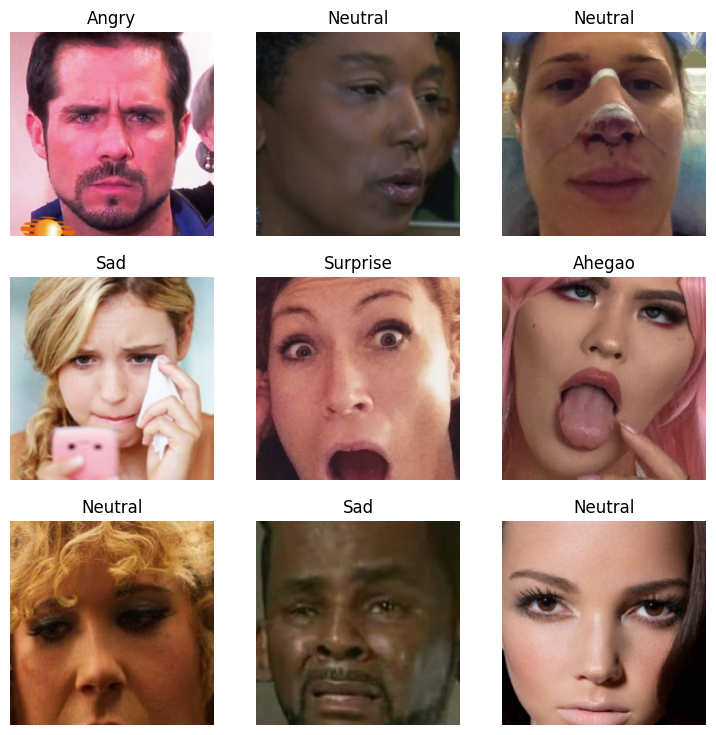

In [31]:
# Show a batch to verify everything is loaded correctly
dls.show_batch(max_n=9)

In [32]:
learn = vision_learner(dls, resnet34, metrics=partial(accuracy_multi, thresh=0.5))
learn.fine_tune(4)

/home/tyler/git/207_hw/.venv/lib/python3.11/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.522840,0.312053,0.867526,00:28


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.253859,0.185162,0.921173,00:29
1,0.178361,0.163549,0.929389,00:29
2,0.135272,0.134670,0.943437,00:28
3,0.107769,0.125209,0.948367,00:29


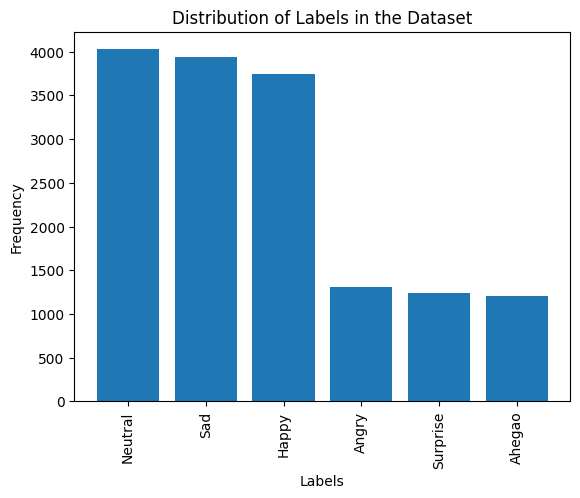

In [33]:
# Plot label distribution using Matplotlib
label_counts = df['labels'].str.split().explode().value_counts()
plt.bar(label_counts.index, label_counts)
plt.xticks(rotation=90)
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Labels in the Dataset')
plt.show()